# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [9]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\massn\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [10]:
# Read your api key environment variable
# YOUR CODE HERE!
api_key = "1ddaa9d5feb3480287f68228077bee1d"


In [11]:
# Create a newsapi client
# YOUR CODE HERE!
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=api_key)


In [12]:
# Fetch the Bitcoin news articles
# YOUR CODE HERE!
btc_headlines = newsapi.get_everything(
    q="Bitcoin",
    language="en"
)

btc_headlines["totalResults"] 

7843

In [13]:
# Fetch the Ethereum news articles
# YOUR CODE HERE!
eth_headline = newsapi.get_everything(
    q="Ethereum",
    language="en"
)

eth_headline['totalResults']

2253

In [14]:


bitcoin_sentiments = []

for article in btc_headlines["articles"]:
    try:
        sentiment = analyzer.polarity_scores(article['content'])
      
        bitcoin_sentiments.append({
            "Text": article["content"],
            "Compound": sentiment["compound"],
            "Positive": sentiment["pos"],
            "Negative": sentiment["neg"],
            "Neutral": sentiment["neu"]
            
        })
        
    except AttributeError:
        pass
    
btc_df = pd.DataFrame(bitcoin_sentiments)


cols =["Compound", "Negative", "Neutral", "Positive", "Text"]
btc_df = btc_df[cols]

btc_df.head()

,Compound,Negative,Neutral,Positive,Text
0,0.6908,0.000,0.822,0.178,"Like Dogecoin devotees, the mayor of Reno, and..."
1,-0.5719,0.184,0.705,0.111,Filed under:\r\nThe supply chain attack has re...
2,-0.6124,0.143,0.857,0.000,image copyrightGetty Images\r\nThe gang behind...
3,0.7264,0.000,0.836,0.164,While retail investors grew more comfortable b...
4,0.2023,0.058,0.833,0.108,"LONDON, June 23 (Reuters) - El Salvador is det..."


In [15]:
Ethereum_sentiments = []

for article in eth_headline["articles"]:
    try:
        sentiment = analyzer.polarity_scores(article['content'])
      
        Ethereum_sentiments.append({
            "Text": article["content"],
            "Compound": sentiment["compound"],
            "Positive": sentiment["pos"],
            "Negative": sentiment["neg"],
            "Neutral": sentiment["neu"]
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
eth_df = pd.DataFrame(Ethereum_sentiments)

# Reorder DataFrame columns
cols =["Compound", "Negative", "Neutral", "Positive", "Text"]
eth_df = eth_df[cols]

eth_df.head()



,Compound,Negative,Neutral,Positive,Text
0,0.3612,0.000,0.925,0.075,There are many blockchain platforms competing ...
1,0.7264,0.000,0.836,0.164,While retail investors grew more comfortable b...
2,-0.2960,0.061,0.939,0.000,It wasn't long ago that your average person ha...
3,0.3612,0.041,0.849,0.110,Bitcoin and Ethereum\r\nYuriko Nakao\r\nEther ...
4,0.6369,0.000,0.843,0.157,"""Anthony Di Iorio, a co-founder of the Ethereu..."


In [16]:
# Describe the Bitcoin Sentiment
# YOUR CODE HERE!
btc_df.describe()


,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.000000,20.00000
mean,0.007505,0.044450,0.899050,0.05645
std,0.398230,0.053827,0.078746,0.06691
min,-0.612400,0.000000,0.705000,0.00000
25%,-0.381800,0.000000,0.840250,0.00000
50%,0.000000,0.028500,0.903500,0.00000
75%,0.231275,0.077000,0.956500,0.11150
max,0.726400,0.184000,1.000000,0.17800


In [17]:
# Describe the Ethereum Sentiment
# YOUR CODE HERE!
eth_df.describe()


,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.193535,0.027600,0.901650,0.070750
std,0.397977,0.035596,0.065204,0.068345
min,-0.381800,0.000000,0.782000,0.000000
25%,-0.074000,0.000000,0.847500,0.000000
50%,0.305600,0.000000,0.920000,0.075000
75%,0.502100,0.067500,0.928500,0.129500
max,0.771700,0.080000,1.000000,0.194000


### Questions:

Q: Which coin had the highest mean positive score?

A: ETH

Q: Which coin had the highest compound score?

A: ETH

Q. Which coin had the highest positive score?

A: ETH

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [18]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re
import nltk
nltk.download('punkt')
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\massn\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\massn\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

def clean_text(article):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    
    re_clean = regex.sub('', article)
    words = word_tokenize(re_clean)
    output = [word.lower() for word in words if word.lower() not in sw]
    return output

# Expand the default stopwords list if necessary
addl_stopwords = [',', '', 'https', 'http', 'btc', 'bitcoin', 'eth', 'ethereum']

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\massn\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [20]:
def tokenizer(text):
    """Tokenizes text."""

    # Create a list of the words
    words = word_tokenize(text)
    
    # Convert the words to lowercase
    words = [word.lower() for word in words]
 
    # Remove the punctuation
    regex = re.compile("[^a-zA-Z ]")
    words = [regex.sub('', word) for word in words]   
    
    # remove the stopwords
    sw = set(stopwords.words('english') + addl_stopwords)
    words = [word.lower() for word in words if word.lower() not in sw]
    
    # Lemmatize Words into root words
    tokens = [lemmatizer.lemmatize(word) for word in words]  
    
    return tokens

In [21]:
# Create a new tokens column for Bitcoin
# YOUR CODE HERE!
btc_tokens = []
[btc_tokens.append(tokenizer(text)) for text in list(btc_df.Text)]
btc_df['Tokens'] = btc_tokens
btc_df.head()

,Compound,Negative,Neutral,Positive,Text,Tokens
0,0.6908,0.000,0.822,0.178,"Like Dogecoin devotees, the mayor of Reno, and...","[like, dogecoin, devotee, mayor, reno, leader,..."
1,-0.5719,0.184,0.705,0.111,Filed under:\r\nThe supply chain attack has re...,"[filed, supply, chain, attack, reached, thousa..."
2,-0.6124,0.143,0.857,0.000,image copyrightGetty Images\r\nThe gang behind...,"[image, copyrightgetty, image, gang, behind, c..."
3,0.7264,0.000,0.836,0.164,While retail investors grew more comfortable b...,"[retail, investor, grew, comfortable, buying, ..."
4,0.2023,0.058,0.833,0.108,"LONDON, June 23 (Reuters) - El Salvador is det...","[london, june, reuters, el, salvador, determin..."


In [22]:
# Create a new tokens column for Ethereum
# YOUR CODE HERE!
eth_tokens = []
[eth_tokens.append(tokenizer(text)) for text in eth_df.Text]   
eth_df['Tokens'] = eth_tokens
eth_df.head()

,Compound,Negative,Neutral,Positive,Text,Tokens
0,0.3612,0.000,0.925,0.075,There are many blockchain platforms competing ...,"[many, blockchain, platform, competing, invest..."
1,0.7264,0.000,0.836,0.164,While retail investors grew more comfortable b...,"[retail, investor, grew, comfortable, buying, ..."
2,-0.2960,0.061,0.939,0.000,It wasn't long ago that your average person ha...,"[nt, long, ago, average, person, clue, nft, no..."
3,0.3612,0.041,0.849,0.110,Bitcoin and Ethereum\r\nYuriko Nakao\r\nEther ...,"[yuriko, nakao, ether, overtook, number, activ..."
4,0.6369,0.000,0.843,0.157,"""Anthony Di Iorio, a co-founder of the Ethereu...","[anthony, di, iorio, cofounder, network, say, ..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [23]:
from collections import Counter
from nltk import ngrams

In [24]:
# Generate the Bitcoin N-grams where N=2
# YOUR CODE HERE!
n = 2
grams = ngrams(tokenizer(btc_df.Text.str.cat()), n)
Counter(grams).most_common(20)

[(('june', 'reuters'), 7),
 (('illustration', 'taken'), 4),
 (('losing', 'previous'), 4),
 (('previous', 'close'), 4),
 (('close', 'world'), 4),
 (('world', 'biggest'), 4),
 (('biggest', 'bestknown'), 4),
 (('bestknown', 'cryptocurrency'), 4),
 (('cryptocurrency', 'char'), 4),
 (('char', 'reuters'), 4),
 (('reuters', 'staff'), 4),
 (('el', 'salvador'), 3),
 (('char', 'representation'), 3),
 (('representation', 'virtual'), 3),
 (('tumbled', 'monday'), 3),
 (('taken', 'june'), 3),
 (('reuters', 'dropped'), 3),
 (('char', 'posted'), 3),
 (('reuters', 'dipped'), 3),
 (('dipped', 'gmt'), 3)]

In [25]:
# Generate the Ethereum N-grams where N=2
# YOUR CODE HERE!
n = 2
grams = ngrams(tokenizer(eth_df.Text.str.cat()), n)
Counter(grams).most_common(20)

[(('world', 'biggest'), 5),
 (('cryptocurrency', 'char'), 5),
 (('june', 'reuters'), 5),
 (('char', 'reuters'), 4),
 (('reuters', 'staff'), 4),
 (('losing', 'previous'), 4),
 (('previous', 'close'), 4),
 (('close', 'world'), 4),
 (('biggest', 'bestknown'), 4),
 (('bestknown', 'cryptocurrency'), 4),
 (('cryptocurrency', 'network'), 3),
 (('staff', 'june'), 3),
 (('reuters', 'dipped'), 3),
 (('dipped', 'gmt'), 3),
 (('char', 'ether'), 2),
 (('ether', 'holder'), 2),
 (('holder', 'staked'), 2),
 (('staked', 'billion'), 2),
 (('billion', 'worth'), 2),
 (('worth', 'cryptocurrency'), 2)]

In [26]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [27]:
# Use token_count to get the top 10 words for Bitcoin
# YOUR CODE HERE
btc_top_10 = tokenizer(btc_df.Text.str.cat())
token_count(btc_top_10, 10)

[('char', 18),
 ('reuters', 15),
 ('june', 10),
 ('cryptocurrency', 9),
 ('illustration', 6),
 ('world', 5),
 ('taken', 5),
 ('monday', 5),
 ('cryptocurrencies', 4),
 ('representation', 4)]

In [28]:
# Use token_count to get the top 10 words for Ethereum
# YOUR CODE HERE!
eth_top_10 = tokenizer(eth_df.Text.str.cat())
token_count(eth_top_10, 10)

[('char', 20),
 ('cryptocurrency', 11),
 ('reuters', 10),
 ('world', 7),
 ('network', 6),
 ('june', 6),
 ('biggest', 5),
 ('investor', 4),
 ('ether', 4),
 ('staff', 4)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [29]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [30]:
##!pip install wordcloud

In [31]:
# Generate the Bitcoin word cloud
# YOUR CODE HERE!
def wordcloud(text, title = ""):
    df_cloud=WordCloud(width=500, colormap="RdYlBu").generate(text)
    plt.imshow(df_cloud)
    plt.axis("off")
    fontdict={"fontsize":48, "fontweight":"bold"}
    plt.title(title, fontdict=fontdict)
    plt.show()


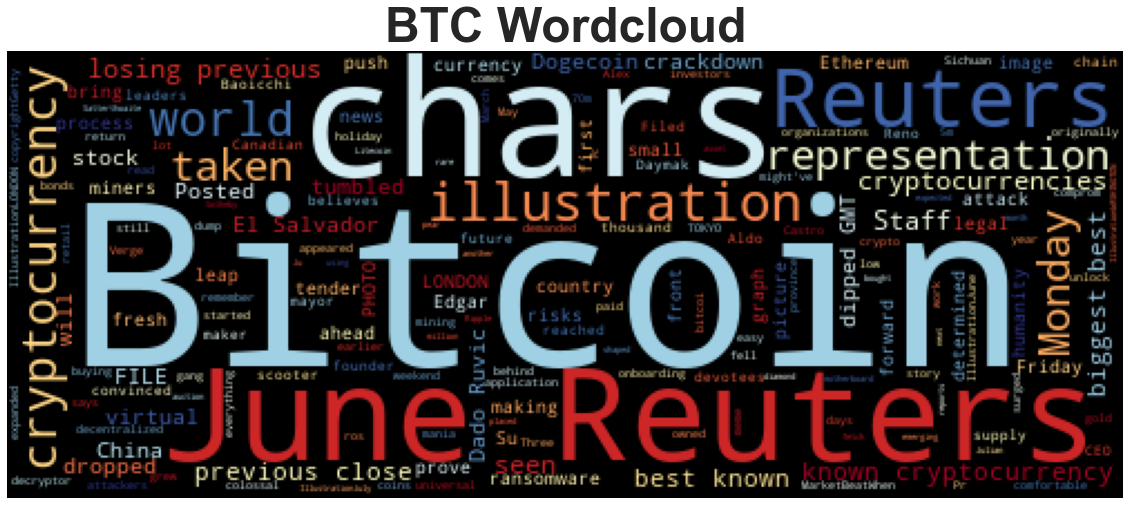

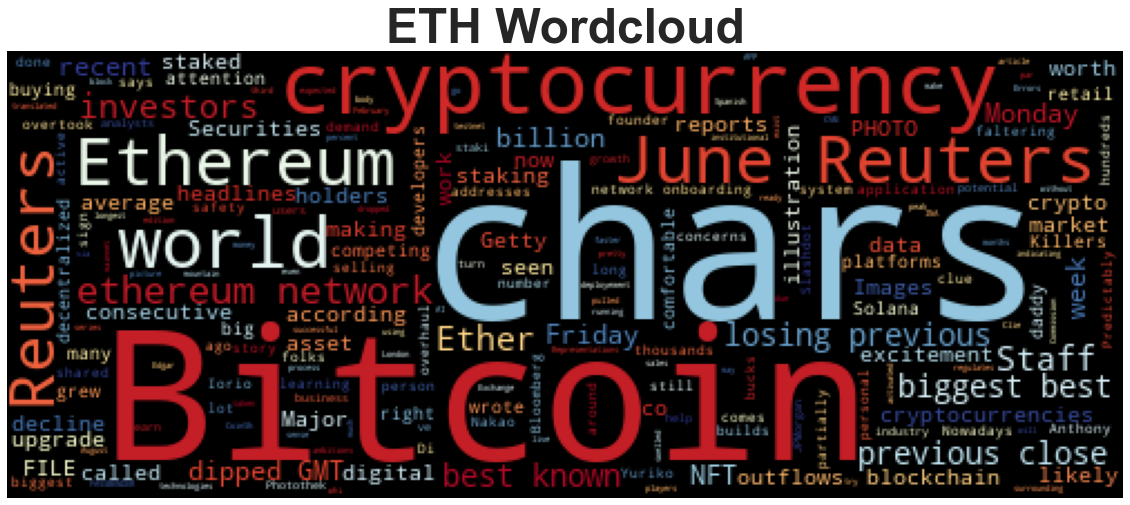

In [32]:
# Generate the Ethereum word cloud
# YOUR CODE HERE!
wordcloud(btc_df.Text.str.cat(), title="BTC Wordcloud")
wordcloud(eth_df.Text.str.cat(), title="ETH Wordcloud")


---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [33]:
!pip install -U spacy
import spacy
from spacy import displacy


Requirement already up-to-date: spacy in c:\users\massn\anaconda3\lib\site-packages (3.1.1)


In [34]:
# Download the language model for SpaCy
!python -m spacy download en_core_web_sm

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [35]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [36]:
# Concatenate all of the Bitcoin text together
# YOUR CODE HERE!
article_btc = btc_df.Text.str.cat()


In [37]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
doc = nlp(article_btc)

# Add a title to the document
# YOUR CODE HERE!
doc.user_data["title"] = "Bitcoin NER"


In [38]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(doc, style='ent', jupyter=True)


In [41]:
# List all Entities
# YOUR CODE HERE!
print([ent.text for ent in doc.ents])


['Reno', 'El Salvador', 'Aldo Baoicchi', 'Canadian', 'Daymak', 'Alex Castro', 'The Verge', 'Three days', 'the holiday weekend', '$70m', '£50.5m', 'Bitcoin and Ethereum', '2021', 'June 23', 'Reuters', 'El Salvador', 'June 23', 'Reuters', 'El Salvador', 'Pr', 'earlier this year', 'March 15, 2021', 'REUTERS', 'Dado Ruvic/', 'June 30', 'Reuters', 'June 21', 'Reuters', 'Monday', 'China', 'Sichuan', 'as low as $32,288', 'first', 'June 14, 2021', 'REUTERS', 'Edgar Su/IllustrationJune 25', 'Reuters', '7.37%', '32,094.44', 'Monday', 'China', 'June 21', 'Reuters', '8.57%', '32,540.35', '2011', 'Monday', '3,049.42', '49.9%', 'Reuters', 'June 21', 'Reuters', '8.57%', '32,540.35', '2011', 'Monday', '3,049.42', 'Reuters', 'FILE', 'June 7, 2021', 'REUTERS', 'Edgar Su/Illustration/File Photo', 'Reuters', '+304', 'Reuters', 'June 25', 'Reuters', '7.37%', '32,094.44', 'Friday', '2,554.88', '50.5', 'May 19, 2021', 'REUTERS', 'Dado Ruvic', 'Reuters', '5.17%', '33', 'up to $15 million', "Sotheby's", 'next 

---

### Ethereum NER

In [42]:
# Concatenate all of the Ethereum text together
# YOUR CODE HERE!
article_eth = eth_df.Text.str.cat()


In [43]:

# Run the NER processor on all of the text
doc_eth = nlp(article_eth)

# Add a title to the document
doc_eth.user_data["title"] = "Ethereum NER"

In [44]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(doc_eth, style='ent', jupyter=True)


In [45]:
# List all Entities
# YOUR CODE HERE!
print([ent.text for ent in doc.ents])


['Reno', 'El Salvador', 'Aldo Baoicchi', 'Canadian', 'Daymak', 'Alex Castro', 'The Verge', 'Three days', 'the holiday weekend', '$70m', '£50.5m', 'Bitcoin and Ethereum', '2021', 'June 23', 'Reuters', 'El Salvador', 'June 23', 'Reuters', 'El Salvador', 'Pr', 'earlier this year', 'March 15, 2021', 'REUTERS', 'Dado Ruvic/', 'June 30', 'Reuters', 'June 21', 'Reuters', 'Monday', 'China', 'Sichuan', 'as low as $32,288', 'first', 'June 14, 2021', 'REUTERS', 'Edgar Su/IllustrationJune 25', 'Reuters', '7.37%', '32,094.44', 'Monday', 'China', 'June 21', 'Reuters', '8.57%', '32,540.35', '2011', 'Monday', '3,049.42', '49.9%', 'Reuters', 'June 21', 'Reuters', '8.57%', '32,540.35', '2011', 'Monday', '3,049.42', 'Reuters', 'FILE', 'June 7, 2021', 'REUTERS', 'Edgar Su/Illustration/File Photo', 'Reuters', '+304', 'Reuters', 'June 25', 'Reuters', '7.37%', '32,094.44', 'Friday', '2,554.88', '50.5', 'May 19, 2021', 'REUTERS', 'Dado Ruvic', 'Reuters', '5.17%', '33', 'up to $15 million', "Sotheby's", 'next 

---